# 📊 Unsupervised Deep Learning: Gaussian Mixture Models & EM-Based Collaborative Filtering

Welcome to this comprehensive course on **Unsupervised Deep Learning**, designed and instructed by **Aditya Saxena**. This course explores the fascinating domain of unsupervised learning, where algorithms discover hidden patterns in data without labeled outputs. You will learn to apply mathematical and algorithmic techniques to understand clustering, probability distributions, and latent variable models—all essential for data-driven decision-making in modern machine learning systems.

The course focuses on practical implementation and theory behind **Gaussian Mixture Models (GMMs)** and the **Expectation-Maximization (EM) algorithm**, culminating in a real-world application: collaborative filtering and matrix completion using the Netflix dataset. By the end of this journey, you will have built a recommendation system from the ground up using probabilistic principles and iterative optimization techniques. This notebook series is structured modularly, includes two mini-projects per module, and emphasizes interpretability, evaluation, and reproducibility.

## 📓 Course Modules
Each module consists of structured Jupyter Notebooks with explanations, derivations, code walkthroughs, and mini-projects.

* Module 01: Introduction to Unsupervised Learning
* Module 02: K-Means Clustering
* Module 03: Gaussian Mixture Models (GMMs)
* Module 04: Expectation-Maximization (EM) Algorithm
* Module 05: EM for Matrix Completion (Netflix Data)
* Module 06: Log-Domain Calculations & Stability
* Module 07: BIC for Model Selection
* Module 08: Completing Missing Entries
* Module 09: Evaluation using RMSE & Model Interpretability
* Module 10: Final Project & Case Study Walkthrough

In [ ]:
# 📦 INSTALL & IMPORT: One-time Setup Cell for the Entire Project

# --- Install required libraries if not already available ---
# !pip install numpy pandas matplotlib seaborn scikit-learn scipy --quiet

# --- Import necessary libraries with detailed comments ---

# NumPy and Pandas: For numerical computations and structured data manipulation
import numpy as np                  # For array operations, statistics, linear algebra
import pandas as pd                 # For handling structured data (CSV, tables)

# Matplotlib and Seaborn: For visualizations
import matplotlib.pyplot as plt    # Core plotting library
import seaborn as sns              # Beautiful, high-level statistical plots

# Scikit-learn modules for clustering, dimensionality reduction, and evaluation
from sklearn.datasets import make_blobs              # Synthetic dataset generator
from sklearn.cluster import KMeans                   # K-Means clustering
from sklearn.mixture import GaussianMixture          # GMM clustering
from sklearn.decomposition import PCA                # Dimensionality reduction
from sklearn.metrics import silhouette_score, mean_squared_error  # Evaluation metrics

# Preprocessing tools
from sklearn.preprocessing import StandardScaler     # Normalize features
from sklearn.impute import SimpleImputer             # Handle missing values

# Log-sum-exp for numerical stability in EM algorithm
from scipy.special import logsumexp                  # Stable log of summed exponentials

# Miscellaneous utilities
import warnings
warnings.filterwarnings("ignore")                    # Suppress warning messages

# Jupyter magic command (must not have inline comments)
%matplotlib inline

# Global plotting configuration
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

print("✅ All required libraries are successfully imported.")


✅ All required libraries are successfully imported.


In [5]:
# 📥 Load dataset from local text file
X = np.loadtxt("dataset/toy_data.txt")

# Preview the shape and first few entries
print(f"✅ Data shape: {X.shape}")
print("🔍 First 5 rows:\n", X[:5])


✅ Data shape: (250, 2)
🔍 First 5 rows:
 [[-1.636  2.413]
 [-2.957  2.296]
 [-2.871  1.832]
 [-2.696  1.327]
 [-2.272  1.738]]


### 📊 Dataset Structure and Label Absence

The dataset loaded has a shape of `(250, 2)`, which tells us there are **250 data points**, each represented by **2 numerical features**. These features could represent abstract dimensions in a high-dimensional space (e.g., behavioral signals, image embeddings, or spatial coordinates), but for our purposes they are synthetic and generated for learning purposes.

Notice that there is **no column for labels**—that is, we are not given any ground truth indicating which cluster or class each data point belongs to. This is a defining characteristic of **unsupervised learning**. Unlike supervised learning, where data points come with labels (e.g., 'dog', 'cat', or 'spam', 'not spam'), here we aim to **discover patterns, groupings, or structures** in the data **without any prior label information**.

In the context of clustering, our goal will be to **infer these groupings** purely from the data distribution. Algorithms like **K-Means** and **Gaussian Mixture Models (GMM)** are designed to find such structure by assigning data points to clusters based on distance or probability, respectively.

In summary:
- 📌 The data has **no labels** (i.e., it is unlabeled).
- 🧠 We will use **unsupervised learning** to uncover natural clusters.
- 🔍 Our tools will be **K-Means** and **GMM**, which infer structure directly from feature patterns.


### 🔍 Visualizing the Unlabeled Dataset

Before we attempt any clustering, it’s helpful to explore the dataset visually. Since our data has only two features, we can easily plot it in 2D. This allows us to gain intuition about whether natural groupings exist and whether clustering is a meaningful next step.

This scatter plot will display all 250 data points, colored uniformly since we do not yet have any labels or cluster assignments. The goal is to identify whether the data exhibits spatial groupings or separations that might hint at latent cluster structure—something unsupervised learning algorithms can uncover.

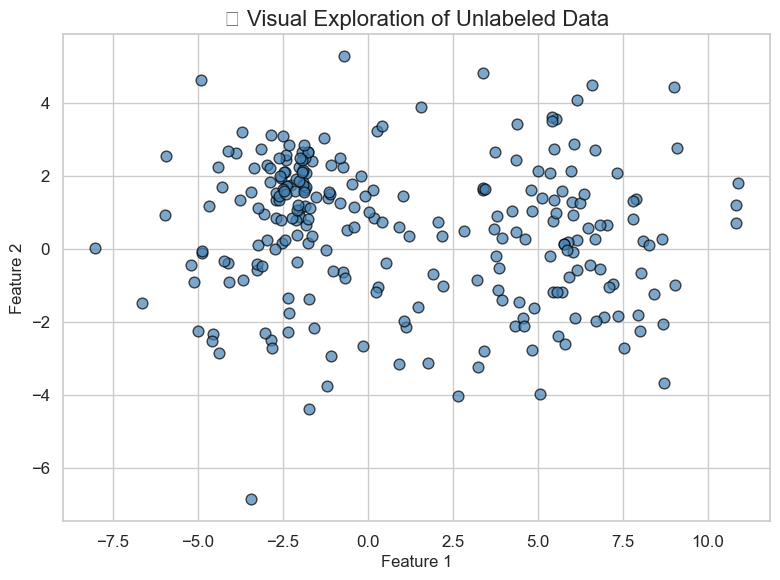

In [6]:
# 📈 Visualize the Dataset in 2D

# Create a scatter plot to visualize the 2D data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], 
            color='steelblue', edgecolor='black', s=60, alpha=0.7)

# Add titles and axis labels for clarity
plt.title("🌀 Visual Exploration of Unlabeled Data", fontsize=16)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Grid and layout
plt.grid(True)
plt.tight_layout()
plt.show()


## 🧠 Module 01: Introduction to Unsupervised Learning

In this module, we begin our journey into unsupervised learning—a branch of machine learning where the goal is to uncover hidden structures or patterns in datasets without the guidance of labeled responses. Unlike supervised learning, where we are provided with input-output pairs, unsupervised learning focuses solely on input data and the discovery of its intrinsic organization.

You'll learn the foundational motivations behind unsupervised learning, its most common techniques such as clustering and dimensionality reduction, and how it forms the backbone of many modern applications including recommendation systems, image segmentation, customer segmentation, and anomaly detection. This module lays the conceptual groundwork for the clustering and matrix completion tasks we will tackle in the coming modules.

---

### 🎯 Learning Objectives
By the end of this module, you should be able to:
- Define unsupervised learning and differentiate it from supervised learning
- Understand real-world scenarios where unsupervised learning is applied
- Describe the general workflow and goals of unsupervised learning algorithms
- Recognize clustering as a core technique within the unsupervised learning family

---

### 🧪 Mini-Project A: Visualizing High-Dimensional Data
**Goal:** Explore a toy dataset using PCA or t-SNE to visualize hidden patterns.
**What You'll Do:**
- Load a dataset with multiple features
- Use dimensionality reduction to project data into 2D
- Visualize the data and interpret any groupings or separations

---

### 🚀 Mini-Project B: Your First Clustering Without Labels
**Goal:** Perform clustering on the same dataset and examine if visual patterns align with algorithmic groupings.
**What You'll Do:**
- Apply KMeans clustering to your projected data
- Compare cluster assignments with visual groupings
- Reflect on the meaning of \"structure\" in unlabeled data

---
